In [14]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

In [15]:
fs = 800 ### sample rate
n_window = 512 ### window length
x = np.arange(n_window)
f1 = 50 ### Hz
y1 = np.sin( (2 * np.pi * f1 / fs) * x )
f2 = 80 ### Hz
y2 = np.sin( (2 * np.pi * f2 / fs) * x )
y = y1 + 0.5 * y2
### Signal with 16000 sample rate can contain 0 ~ 8000 Hz wave.
### Fourier transorm with 512 window length can have 0 ~ 256
### cycle of wave base. As a result, the resolution of frequency
### is 8000 / 256.
resolution = (fs / 2) / (n_window / 2)
print("resolution of frequency: ", resolution)

resolution of frequency:  1.5625


In [16]:
fft_y = fft(y)
fft_y_abs = np.absolute(fft_y[:n_window // 2 + 1])
ifft_y = ifft(fft_y).real

print(resolution * (np.argmax(fft_y_abs) - 0.5),
      "<", 
      f1,
      "<",
      resolution * (np.argmax(fft_y_abs) + 0.5)  )
print("y == ifft_y", np.allclose(y, ifft_y))

49.21875 < 50 < 50.78125
y == ifft_y True


Text(0.5, 1.0, 'Hamming')

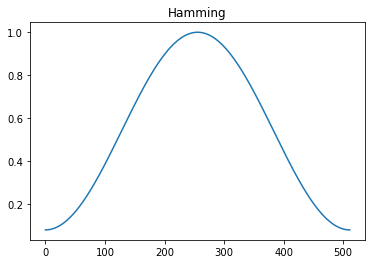

In [17]:
hamming = np.hamming(n_window)
plt.figure(1)
plt.plot(hamming)
plt.title("Hamming")

##### Sepctral leakage

The FFT input signal is inherently truncated. This truncation can be modeled as multiplication of an infinite signal with a rectangular window function. In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form . This convolution is the cause of an effect called spectral leakage.

Windowing the signal with a dedicated window function helps mitigate spectral leakage.

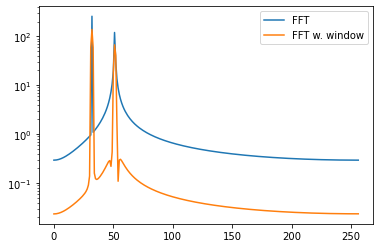

In [18]:
fft_y_hamming = fft(y * hamming)
fft_y_hamming_abs = np.absolute(fft_y_hamming[:n_window // 2 + 1])
plt.figure(2)
plt.semilogy(fft_y_abs)
plt.semilogy(fft_y_hamming_abs)
plt.legend(['FFT', 'FFT w. window'])

In [19]:
### Hamming window does not contain 0, so
### it is easier to do the inverse process.
ifft_y_hamming = ifft(fft_y_hamming).real
ifft_y_hamming /= hamming
print("y == ifft_y_hamming", np.allclose(y, ifft_y_hamming))

y == ifft_y_hamming True


In [20]:
def my_dft(x):
    x = np.array(x)
    n_window = len(x)
    y = []
    for k in range(n_window):
        base = np.exp( -1j * 2 * np.pi * k * np.arange(n_window) / n_window )
        y.append( np.sum(x * base) )
    return np.array(y)

def my_dift(x):
    x = np.array(x)
    n_window = len(x)
    y = []
    for k in range(n_window):
        base = np.exp( 1j * 2 * np.pi * k * np.arange(n_window) / n_window )
        y.append( np.sum(x * base) )
    return np.array(y) / n_window

my_dft_y = my_dft(y)
print("fft_y == my_dft_y", np.allclose(fft_y, my_dft_y))

my_dift_y = my_dift(my_dft_y)
print( "ifft_y == my_dift_y", np.allclose(ifft(fft_y), my_dift_y) )

fft_y == my_dft_y True
ifft_y == my_dift_y True


![](formula.PNG)

F(N, k) = F<sub>even</sub>(N / 2, k) + w<sub>k</sub> x F<sub>odd</sub>(N / 2 , k)

![](cycle.PNG)

F(N / 2, k + N / 2) = F(N / 2, k)

![](F_12_2.gif)

The time complexity of FFT is O( n log n )

In [23]:
def my_fft(x):
    x = np.array(x)
    n_window = len(x)
    if n_window == 1:
        return x
    elif n_window % 2 > 0:
        raise ValueError("size of x must be a power of 2.")
    else:
        x_even = my_fft(x[::2])
        x_odd = my_fft(x[1::2])
        factor = np.exp( -1j * 2 * np.pi * np.arange(n_window) / n_window)
        return np.concatenate([x_even + factor[:n_window // 2] * x_odd,
                               x_even + factor[n_window // 2:] * x_odd])

my_fft_y = my_fft(y)
print("fft_y == my_fft_y", np.allclose(fft_y, my_fft_y))

fft_y == my_fft_y True
